In [40]:
import random

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import shap
import random


# **ANALISIS EXPLORATORIO**

Cargamos e inspeccionamos los datos

In [41]:
hoja1 = pd.read_excel('Data/CC FT 17   Formato de Control de Calidad Café de Trillado (1).xlsx', sheet_name= 'CONTROL CALIDAD CAFE TRILLADO J',header = 5)
hoja2 = pd.read_excel('Data/CC FT 17   Formato de Control de Calidad Café de Trillado (1).xlsx', sheet_name= 'Sheet2',header = 5)
tostion1 = pd.read_excel('Data/CC FT 18  Formato de  Tostión (1).xlsx',sheet_name='TOSTIÓN JERICÓ L', header = 5)
tostion2 = pd.read_excel('Data/CC FT 18  Formato de  Tostión (1).xlsx',sheet_name='TOSTIÓN JERICÓ', header = 5)
Formato_Despachos = pd.read_excel('Data/CC FT 21   Formato de Control de Despachos (1).xlsx', header = 5)

In [42]:
Ctrl_trillado = pd.concat([hoja1,hoja2])
Formato_tostion = pd.concat([tostion1,tostion2])

In [43]:
print(Ctrl_trillado.head())
print(Formato_tostion.head())
print(Formato_Despachos.head())

      FECHA     LOTE   DENOMINACIÓN/     MARCA  CANTIDAD    %H Unnamed: 5  \
0       NaN        NaN                     NaN       NaN   NaN        NaN   
1       NaN        NaN                     NaN       NaN     %       C/NC   
2  19-07-22  01-190722            Madre Laura      765.0  10.9         C    
3   19-7-22  09-190722           Tabi Natural      204.0  10.2          C   
4  19-07-22  10-190722              Don Mario      165.0  10.7          C   

  MALLAS Unnamed: 7 VERIFICACIÓN FISICA CAFÉ TOSTADO   \
0    NaN        NaN                               NaN   
1      #       C/NC                              C/NC   
2     14         C                                  C   
3     14          C                                 C   
4     14          C                                 C   

                                   NOTAS DE CATACIÓN PUNTAJE Unnamed: 11  \
0                                                NaN     NaN         NaN   
1                                         

In [44]:
print('columnas de las tablas: ')
print(Ctrl_trillado.columns)
print(Formato_tostion.columns)
print(Formato_Despachos.columns)

columnas de las tablas: 
Index(['FECHA', 'LOTE  ', 'DENOMINACIÓN/     MARCA', 'CANTIDAD', '%H',
       'Unnamed: 5', 'MALLAS', 'Unnamed: 7',
       'VERIFICACIÓN FISICA CAFÉ TOSTADO ', 'NOTAS DE CATACIÓN', 'PUNTAJE',
       'Unnamed: 11', 'LIBERACIÓN DE LOTE', 'RESPONSABLE ', 'CANTIDAD '],
      dtype='object')
Index(['Fecha ', 'Lote ', 'Origen', 'Variedad', 'Proceso', 'Beneficio ',
       'Peso en Verde', 'Merma ', 'Peso en Tostado ', 'Perfil ',
       'Temp. De inicio y final', 'Tiempo de tueste', 'Observaciones ',
       'Tostador'],
      dtype='object')
Index(['# PEDIDO ', 'FECHA DE TUESTE ', 'FECHA DE EMPAQUE ', 'TIPO DE CAFÉ   ',
       'PRESENTACIÓN ', 'Unnamed: 5', 'CANTIDAD ', 'Unnamed: 7', 'Unnamed: 8',
       'CLIENTE ', 'RESPONSABLE DESPACHO ', 'VERIFICA '],
      dtype='object')


Identificacion y limpieza de columnas importantes

In [45]:
'''emparejo los titulos de las columnas para poder hacer su tratamiento mas comodo'''

Ctrl_trillado.columns = Ctrl_trillado.columns.str.strip().str.lower().str.replace(' ','')
Formato_tostion.columns = Formato_tostion.columns.str.strip().str.lower().str.replace(' ','')
Formato_Despachos.columns = Formato_Despachos.columns.str.strip().str.lower().str.replace(' ','')
print(Ctrl_trillado.columns)
print(Formato_tostion.columns)
print(Formato_Despachos.columns)

Index(['fecha', 'lote', 'denominación/marca', 'cantidad', '%h', 'unnamed:5',
       'mallas', 'unnamed:7', 'verificaciónfisicacafétostado',
       'notasdecatación', 'puntaje', 'unnamed:11', 'liberacióndelote',
       'responsable', 'cantidad'],
      dtype='object')
Index(['fecha', 'lote', 'origen', 'variedad', 'proceso', 'beneficio',
       'pesoenverde', 'merma', 'pesoentostado', 'perfil',
       'temp.deinicioyfinal', 'tiempodetueste', 'observaciones', 'tostador'],
      dtype='object')
Index(['#pedido', 'fechadetueste', 'fechadeempaque', 'tipodecafé',
       'presentación', 'unnamed:5', 'cantidad', 'unnamed:7', 'unnamed:8',
       'cliente', 'responsabledespacho', 'verifica'],
      dtype='object')


In [46]:
print(Ctrl_trillado.info())
print(Formato_tostion.info())
print(Formato_Despachos.info())

<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, 0 to 45
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   fecha                          116 non-null    object 
 1   lote                           108 non-null    object 
 2   denominación/marca             108 non-null    object 
 3   cantidad                       76 non-null     float64
 4   %h                             110 non-null    object 
 5   unnamed:5                      112 non-null    object 
 6   mallas                         110 non-null    object 
 7   unnamed:7                      110 non-null    object 
 8   verificaciónfisicacafétostado  110 non-null    object 
 9   notasdecatación                107 non-null    object 
 10  puntaje                        108 non-null    object 
 11  unnamed:11                     109 non-null    object 
 12  liberacióndelote               109 non-null    object 
 

In [47]:
print(Ctrl_trillado.head())
print(Formato_tostion.head())
print(Formato_Despachos.head())

      fecha       lote denominación/marca  cantidad    %h unnamed:5 mallas  \
0       NaN        NaN                NaN       NaN   NaN       NaN    NaN   
1       NaN        NaN                NaN       NaN     %      C/NC      #   
2  19-07-22  01-190722       Madre Laura      765.0  10.9        C      14   
3   19-7-22  09-190722      Tabi Natural      204.0  10.2         C     14   
4  19-07-22  10-190722         Don Mario      165.0  10.7         C     14   

  unnamed:7 verificaciónfisicacafétostado  \
0       NaN                           NaN   
1      C/NC                          C/NC   
2        C                              C   
3         C                             C   
4         C                             C   

                                     notasdecatación puntaje unnamed:11  \
0                                                NaN     NaN        NaN   
1                                                NaN      N°       C/NC   
2  Chocolate negro, toque frutal, c

In [48]:
'''uso de merge para trabajar con una sola tabla'''

df = pd.merge(Ctrl_trillado, Formato_tostion, how='outer', on='lote')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   fecha_x                        520 non-null    object 
 1   lote                           633 non-null    object 
 2   denominación/marca             512 non-null    object 
 3   cantidad                       442 non-null    float64
 4   %h                             514 non-null    object 
 5   unnamed:5                      516 non-null    object 
 6   mallas                         514 non-null    object 
 7   unnamed:7                      514 non-null    object 
 8   verificaciónfisicacafétostado  514 non-null    object 
 9   notasdecatación                511 non-null    object 
 10  puntaje                        506 non-null    object 
 11  unnamed:11                     513 non-null    object 
 12  liberacióndelote               513 non-null    obj

In [49]:

datos_de_interes = ['%h','mallas','origen','variedad','proceso','beneficio','pesoenverde','pesoentostado','merma','perfil','temp.deinicioyfinal','tiempodetueste','puntaje']

df_final = pd.DataFrame()
for i in datos_de_interes:
    cont = 0
    df_final.insert(cont,i,df[i])
    cont += 1
print(df_final.info())
print(df_final.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   puntaje              506 non-null    object 
 1   tiempodetueste       590 non-null    object 
 2   temp.deinicioyfinal  590 non-null    object 
 3   perfil               590 non-null    object 
 4   merma                590 non-null    float64
 5   pesoentostado        590 non-null    float64
 6   pesoenverde          590 non-null    float64
 7   beneficio            590 non-null    object 
 8   proceso              590 non-null    object 
 9   variedad             590 non-null    object 
 10  origen               590 non-null    object 
 11  mallas               514 non-null    object 
 12  %h                   514 non-null    object 
dtypes: float64(3), object(10)
memory usage: 67.8+ KB
None
   puntaje tiempodetueste temp.deinicioyfinal     perfil      merma  \
0       84     

In [50]:
'''tratamiento especial a los datos de tiempodetueste debido a errores en el label
y perdida de datos'''
valores = []
for i in df_final['tiempodetueste']:
    #print(type(i).__name__)

    if type(i).__name__ != 'time':
        i = random.choice(df_final['tiempodetueste'][0:10])
        valores.append(i)
    else:
        valores.append(i)
df_final['tiempodetueste'] = valores
        
print(df_final.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   puntaje              506 non-null    object 
 1   tiempodetueste       666 non-null    object 
 2   temp.deinicioyfinal  590 non-null    object 
 3   perfil               590 non-null    object 
 4   merma                590 non-null    float64
 5   pesoentostado        590 non-null    float64
 6   pesoenverde          590 non-null    float64
 7   beneficio            590 non-null    object 
 8   proceso              590 non-null    object 
 9   variedad             590 non-null    object 
 10  origen               590 non-null    object 
 11  mallas               514 non-null    object 
 12  %h                   514 non-null    object 
dtypes: float64(3), object(10)
memory usage: 67.8+ KB
None


Homogenizacion de los datos

In [51]:
'''asignamos valores numericos a las variables categoricas'''

le = LabelEncoder()
for i in df_final:
    if (i!='%h' and i!='mallas' and i!='puntaje') and (df_final[i].dtypes != 'float64'): #se excluyen %h, puntaje y mallas porque son numericas y mas adelante se resolvera
        print(i)
        df_final[i] = le.fit_transform(df_final[i])
print(df_final.info())

tiempodetueste
temp.deinicioyfinal
perfil
beneficio
proceso
variedad
origen
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   puntaje              506 non-null    object 
 1   tiempodetueste       666 non-null    int64  
 2   temp.deinicioyfinal  666 non-null    int64  
 3   perfil               666 non-null    int64  
 4   merma                590 non-null    float64
 5   pesoentostado        590 non-null    float64
 6   pesoenverde          590 non-null    float64
 7   beneficio            666 non-null    int64  
 8   proceso              666 non-null    int64  
 9   variedad             666 non-null    int64  
 10  origen               666 non-null    int64  
 11  mallas               514 non-null    object 
 12  %h                   514 non-null    object 
dtypes: float64(3), int64(7), object(3)
memory usage: 67.8+ KB
None


In [52]:
df_final = df_final.apply(lambda  col: pd.to_numeric(col, errors='coerce') if col.dtypes == 'object' else col)

In [53]:
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   puntaje              499 non-null    float64
 1   tiempodetueste       666 non-null    int64  
 2   temp.deinicioyfinal  666 non-null    int64  
 3   perfil               666 non-null    int64  
 4   merma                590 non-null    float64
 5   pesoentostado        590 non-null    float64
 6   pesoenverde          590 non-null    float64
 7   beneficio            666 non-null    int64  
 8   proceso              666 non-null    int64  
 9   variedad             666 non-null    int64  
 10  origen               666 non-null    int64  
 11  mallas               512 non-null    float64
 12  %h                   510 non-null    float64
dtypes: float64(6), int64(7)
memory usage: 67.8 KB
None


# **Definición de variables y preprocesamiento**

se escoje la variable objetivo y las variables de enrtada

In [54]:
VariableObjetivoY = df_final['puntaje'].copy()
VariableEntradaX = df_final.drop('puntaje',axis=1).copy()

In [55]:
VariableObjetivoY = VariableObjetivoY.fillna(df_final['puntaje'].mean())
print(VariableObjetivoY.info())
print(VariableEntradaX.info())
print(VariableEntradaX.columns)

<class 'pandas.core.series.Series'>
RangeIndex: 666 entries, 0 to 665
Series name: puntaje
Non-Null Count  Dtype  
--------------  -----  
666 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tiempodetueste       666 non-null    int64  
 1   temp.deinicioyfinal  666 non-null    int64  
 2   perfil               666 non-null    int64  
 3   merma                590 non-null    float64
 4   pesoentostado        590 non-null    float64
 5   pesoenverde          590 non-null    float64
 6   beneficio            666 non-null    int64  
 7   proceso              666 non-null    int64  
 8   variedad             666 non-null    int64  
 9   origen               666 non-null    int64  
 10  mallas               512 non-null    float64
 11  %h                   510 non-nul

vemos que hay una incongruencia con la cantidad de valores, asi que para reemplazar los NaN usaremos la Media

In [56]:
for i in VariableEntradaX.columns:
    VariableEntradaX.loc[:,i] = VariableEntradaX[i].fillna(df_final[i].mean())#loc para acceder a las comulnas

In [57]:
print(VariableObjetivoY.info())
print(VariableEntradaX.info())

<class 'pandas.core.series.Series'>
RangeIndex: 666 entries, 0 to 665
Series name: puntaje
Non-Null Count  Dtype  
--------------  -----  
666 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tiempodetueste       666 non-null    int64  
 1   temp.deinicioyfinal  666 non-null    int64  
 2   perfil               666 non-null    int64  
 3   merma                666 non-null    float64
 4   pesoentostado        666 non-null    float64
 5   pesoenverde          666 non-null    float64
 6   beneficio            666 non-null    int64  
 7   proceso              666 non-null    int64  
 8   variedad             666 non-null    int64  
 9   origen               666 non-null    int64  
 10  mallas               666 non-null    float64
 11  %h                   666 non-nul

Prosigo con el escalado


In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(VariableEntradaX)
X_scaled = pd.DataFrame(X_scaled, columns=VariableEntradaX.columns)

In [59]:
print(X_scaled.head(20))
print(X_scaled.info())

    tiempodetueste  temp.deinicioyfinal    perfil     merma  pesoentostado  \
0         1.324387             0.256377 -2.758507 -0.413028       6.421227   
1        -1.626724             0.256377 -0.679481 -0.204533       1.322011   
2        -1.626724             0.256377 -0.679481 -1.038514      -0.624190   
3         1.324387             0.256377 -2.758507  1.463430      -0.611442   
4        -1.626724             0.256377 -0.679481 -0.204533       0.153440   
5         1.324387             0.256377 -2.758507 -0.538125      -0.607193   
6         1.324387             0.256377 -2.758507 -0.204533      -0.165261   
7        -0.207921            -0.946067  0.013527 -0.204533       2.278114   
8         1.437891             0.256377 -2.758507 -0.204533       2.278114   
9         0.643361             0.256377 -0.679481 -0.204533       0.365908   
10       -0.207921            -0.946067  0.013527 -0.204533       0.047207   
11        0.359601             0.256377 -2.758507  0.553632     

division de los datos en conjuntos de prueba y entrenamiento


In [60]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, VariableObjetivoY, test_size=0.3, random_state=42)

# **ENTRENAMIENTO DE MODELOS DE REGRESION**

In [61]:
pd.DataFrame(x_train).to_csv('Data/X_train.csv', index=False)
pd.DataFrame(x_test).to_csv('Data/X_test.csv', index=False)
pd.DataFrame(y_train).to_csv('Data/Y_train.csv', index=False)
pd.DataFrame(y_test).to_csv('Data/Y_test.csv', index=False)

Modelo # y Modelo #2


In [62]:
xTrain = pd.read_csv('Data/X_train.csv').values
xTest = pd.read_csv('Data/X_test.csv').values
yTrain = pd.read_csv('Data/Y_train.csv').values
yTest = pd.read_csv('Data/Y_test.csv').values

In [63]:
Modelo_lr = LinearRegression()
modelo_rf = RandomForestRegressor(random_state=42)

In [64]:
Modelo_lr.fit(xTrain, yTrain)
modelo_rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

Evaluacion de los modelos

In [65]:
modelos = [('Regresion lineal',Modelo_lr),('Random Forest',modelo_rf)]

for name, model in modelos:
    y_pred = model.predict(x_test)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    abse = mean_absolute_error(y_test, y_pred)

    print(f'{name} -> RMSE: {rmse:.2f} | R2: {r2:.2f} | Absolute Error: {abse:.2f}')



Regresion lineal -> RMSE: 0.89 | R2: 0.42 | Absolute Error: 0.67
Random Forest -> RMSE: 0.18 | R2: 0.88 | Absolute Error: 0.12


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# **Explicacion de modelo**


se hara unicamente del random forest debido a que fue el que mejores resultados arrojo

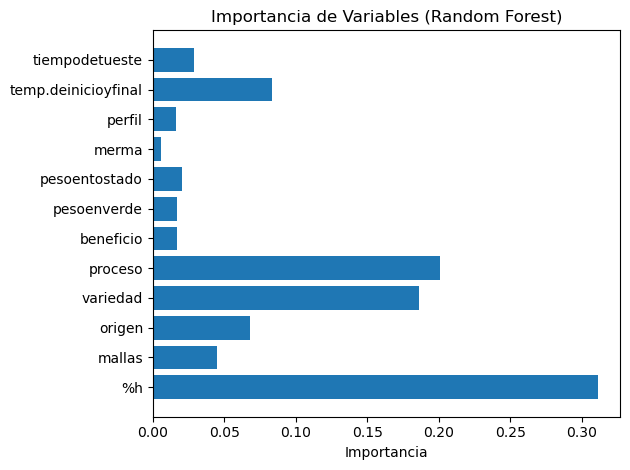

In [66]:
'''Feature importances'''

importances = modelo_rf.feature_importances_
plt.barh(x_train.columns, importances)
plt.title("Importancia de Variables (Random Forest)")
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

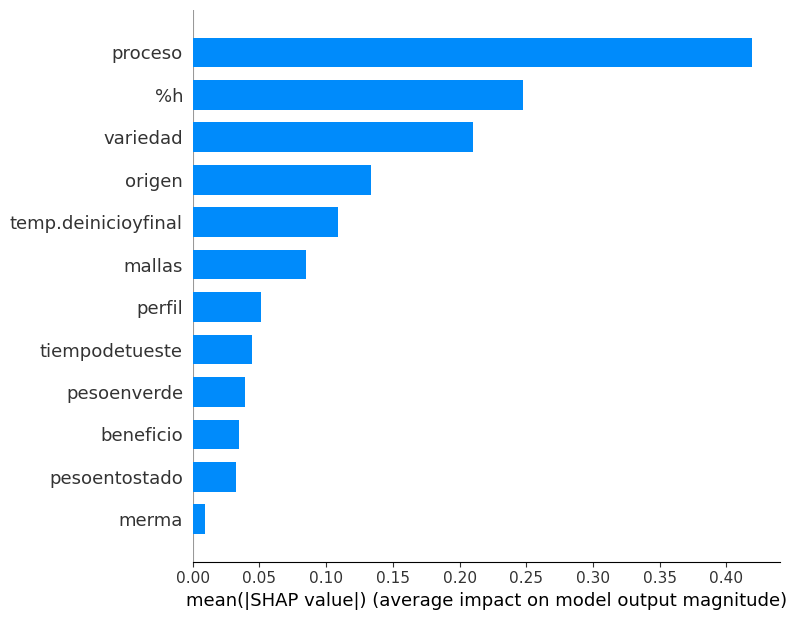

In [67]:
'''SHAP'''

explainer = shap.TreeExplainer(modelo_rf)
shap_values = explainer.shap_values(X_scaled)
shap.summary_plot(shap_values, x_train, plot_type='bar')